In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. DataFrame - 컬럼명 변경 및 추가

In [2]:
data1 = {
    'name':['James','Peter','Robert','Tom'],
    'address':['NY','NY','LA','Texas'],
    'age':[33,44,55,66]
}
df1 = pd.DataFrame(data1)
df1

,name,address,age
0,James,NY,33
1,Peter,NY,44
2,Robert,LA,55
3,Tom,Texas,66


In [3]:
df2 = pd.DataFrame(np.random.randint(10,100,16).reshape(4,4),index=list('ABCD'), 
                   columns=['one','two','three','four'])
df2

,one,two,three,four
A,39,11,68,78
B,30,73,16,23
C,85,38,64,64
D,91,49,39,79


In [4]:
# 컬럼명 변경(전체)
df2.columns = ['A-class','B-class','C-class','D-class']
df2

,A-class,B-class,C-class,D-class
A,39,11,68,78
B,30,73,16,23
C,85,38,64,64
D,91,49,39,79


In [5]:
df1.rename(columns={'address':'addr'}, inplace=True)

#### 2. DataFrame - 조회하기

In [6]:
df2.columns = ['one','two','three','four']
df2

#1.
print(df2[0:2])
print('-'*30)
print(df2['A':'B'])
print('-'*30)
# print(df2['one':'three']) # 당연히 안됨
print('-'*30)

   one  two  three  four
A   39   11     68    78
B   30   73     16    23
------------------------------
   one  two  three  four
A   39   11     68    78
B   30   73     16    23
------------------------------
------------------------------


In [7]:
df2[['one','two']] # 2차원이므로 대괄호 두번

,one,two
A,39,11
B,30,73
C,85,38
D,91,49


In [8]:
df2['A':'C']

,one,two,three,four
A,39,11,68,78
B,30,73,16,23
C,85,38,64,64


In [9]:
df2[df2['two'] > 45]['two']

B    73
D    49
Name: two, dtype: int32

#### 3. iloc, loc | iat, at 조회하기
--- iat, at은 스칼라값 가져오는 용도이다.(단일값)

In [10]:
df1

,name,addr,age
0,James,NY,33
1,Peter,NY,44
2,Robert,LA,55
3,Tom,Texas,66


In [11]:
print(df1.iloc[0:2,0:3])
print('-'*30)
print(df1.iloc[:2,:3])
print('-'*30)
print(df1.iloc[:2])

    name addr  age
0  James   NY   33
1  Peter   NY   44
------------------------------
    name addr  age
0  James   NY   33
1  Peter   NY   44
------------------------------
    name addr  age
0  James   NY   33
1  Peter   NY   44


In [12]:
print(df1.loc[:1,:'addr'])

    name addr
0  James   NY
1  Peter   NY


In [13]:
# 스칼라값 가져오기... iat, at
print(df1)
print('-'*30)
print(df1.at[2,'age'])
print('-'*30)
print(df1.at[3,'addr'])
print('-'*30)
print(df1.iat[1,1])
print('-'*30)
print(df1.iat[2,2])

     name   addr  age
0   James     NY   33
1   Peter     NY   44
2  Robert     LA   55
3     Tom  Texas   66
------------------------------
55
------------------------------
Texas
------------------------------
NY
------------------------------
55


In [14]:
print(df2)
#two에서 45보다 큰값만
print('-'*30)
print(df2[df2['two']>45][['two']])
print('-'*30)
print(df2.loc[df2['two']>45,['two']])
print('-'*30)

   one  two  three  four
A   39   11     68    78
B   30   73     16    23
C   85   38     64    64
D   91   49     39    79
------------------------------
   two
B   73
D   49
------------------------------
   two
B   73
D   49
------------------------------


#### 4. 누락데이터 삭제하기 -- drop()

In [15]:
df1

,name,addr,age
0,James,NY,33
1,Peter,NY,44
2,Robert,LA,55
3,Tom,Texas,66


In [16]:
df1['phone'] = np.nan
df1

,name,addr,age,phone
0,James,NY,33,NaN
1,Peter,NY,44,NaN
2,Robert,LA,55,NaN
3,Tom,Texas,66,NaN


In [17]:
df1.loc[4] = np.nan
df1

,name,addr,age,phone
0,James,NY,33.0,NaN
1,Peter,NY,44.0,NaN
2,Robert,LA,55.0,NaN
3,Tom,Texas,66.0,NaN
4,NaN,NaN,NaN,NaN


In [18]:
df1.drop(labels='phone', axis=1, inplace=True)

In [19]:
df1.drop(labels=4, axis=0, inplace=True)

In [20]:
df1

,name,addr,age
0,James,NY,33.0
1,Peter,NY,44.0
2,Robert,LA,55.0
3,Tom,Texas,66.0


#### 5. DataFrame - 누락데이터 삭제하기(dropna())

In [21]:
'''
판다스에서는 누락 데이터를 모두 NaN으로 처리한다.
통계함수는 누락데이터를 배제하고 연산한다.
dropna() - nan값이 하나라도 있는 모든 행을 삭제
dropna(how='all') - 모든 값이 Nan인 행만 삭제
dropna(how='any') - 하나라도 Nan이 있으면 그 행 삭제
dropna(thresh=3) - row에 실제 값이 3개보다 적으면 그 행 삭제
----------------------------------------------------------
fillna() - NaN데이터를 다른 값으로 채우는 함수
----------------------------------------------------------
'''


"\n판다스에서는 누락 데이터를 모두 NaN으로 처리한다.\n통계함수는 누락데이터를 배제하고 연산한다.\ndropna() - nan값이 하나라도 있는 모든 행을 삭제\ndropna(how='all') - 모든 값이 Nan인 행만 삭제\ndropna(how='any') - 하나라도 Nan이 있으면 그 행 삭제\ndropna(thresh=2) - NaN이 2개 이상있으면 그 행을 삭제한다.\n----------------------------------------------------------\nfillna() - NaN데이터를 다른 값으로 채우는 함수\n----------------------------------------------------------\n"

In [22]:
from numpy import nan as NA
df = pd.DataFrame([[1,6.5,3],[1, NA, NA], [NA,NA,NA],[NA,6.5,3]])
df

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [23]:
df.dropna(thresh=3)

,0,1,2
0,1.0,6.5,3.0


In [248]:
removeNa = df.dropna()
removeNa

,0,1,2
0,1.0,6.5,3.0


In [249]:
df.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


In [251]:
df.dropna(thresh=2)

,0,1,2
0,1.0,6.5,3.0
3,NaN,6.5,3.0


In [254]:
df.fillna(0)

,0,1,2
0,1.0,6.5,3.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,6.5,3.0


In [255]:
df.fillna(df.mean()) # 열의 평균

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,6.5,3.0
3,1.0,6.5,3.0


In [258]:
df.fillna(method='ffill') # na 바로 위에값으로 채움

,0,1,2
0,1.0,6.5,3.0
1,1.0,6.5,3.0
2,1.0,6.5,3.0
3,1.0,6.5,3.0


#### 6. DataFrame - 정렬하기
---- sort_index() | sort_values()

In [273]:
df2_sort = df2.sort_index(axis = 1, ascending=False) # axis=0은 인덱스정렬, axis=1은 컬럼정렬
df2_sort

,two,three,one,four
A,32,69,73,49
B,31,60,72,46
C,99,49,70,17
D,95,27,39,92


In [275]:
df2.sort_values(by='four')

,one,two,three,four
C,70,99,49,17
B,72,31,60,46
A,73,32,69,49
D,39,95,27,92


### 실전데이터로 응용하기

In [283]:
df3 = pd.read_csv('../data/tips.csv')
df3.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0


In [285]:
# 문제 1. tip이라는 컬럼으로 내림차순 정렬 샘플데이터 5개만
df3.sort_values(by='tip',ascending=False).head()

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3.0
212,48.33,9.00,Male,No,Sat,Dinner,4.0
23,39.42,7.58,Male,No,Sat,Dinner,4.0
59,48.27,6.73,Male,No,Sat,Dinner,4.0
141,34.30,6.70,Male,No,Thur,Lunch,6.0


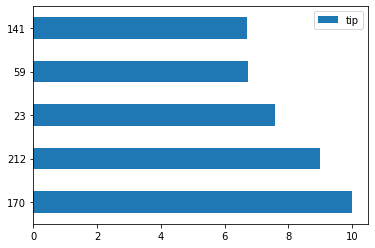

In [311]:
# 위의 정렬된 결과를 시각화
# df3.sort_values(by='tip',ascending=False).head().plot(kind='bar')
df3.sort_values(by='tip',ascending=False).head().plot(kind='barh',y='tip')
plt.show()

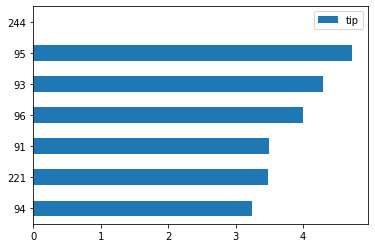

In [309]:
# 문제 2. day, tip 컬럼을 차례로 내림,오름으로 정렬, 맨 뒤 7개 + 시각화
df3.sort_values(by=['day','tip'],ascending=[False,True]).tail(7).plot(kind='barh',y='tip')

In [312]:
df3['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [313]:
df3

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


In [ ]:
특징을 원하는부분만